Características más importantes en el modelo:
  feature  importance
0      UI    0.592958
1     mes    0.407042


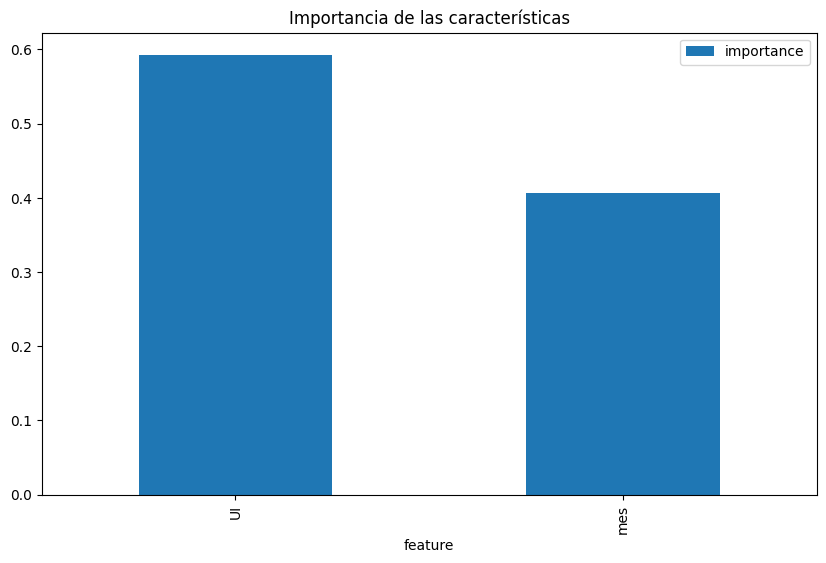

Precisión del modelo: 74.69%


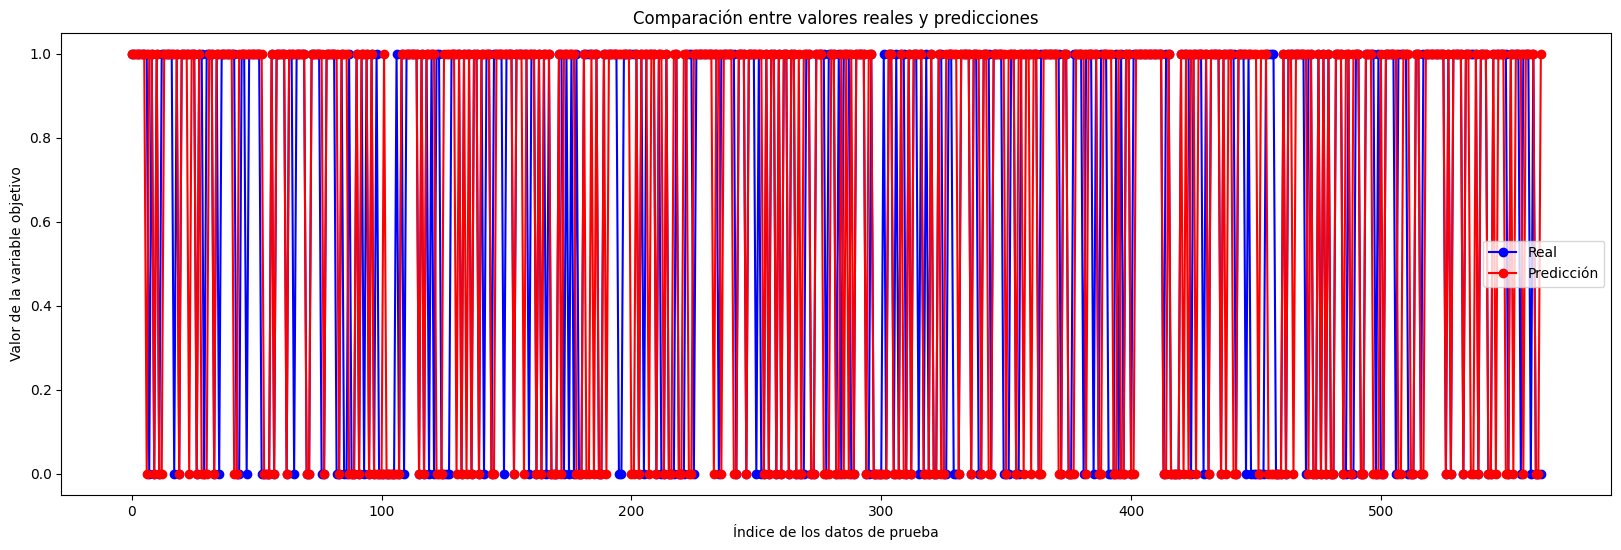

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Cargar el dataset
data = pd.read_csv('../data/processed/cangas_IU.csv')

# Convertir la columna 'fecha' a formato de fecha
data['fecha'] = pd.to_datetime(data['fecha'])

# Añadir la variable estacional del mes
data['mes'] = data['fecha'].dt.month  # Mes del año 1-12

# Eliminar filas con valores NaN generados por las operaciones anteriores, si hubiera
data = data.dropna()

# Dividir los datos en características (X) y etiquetas (y)
X = data[['UI', 'mes']]
y = data['abierto/cerrado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar filas con valores NaN en los conjuntos de entrenamiento y prueba
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Asegurarse de que y_train tenga la misma longitud que X_train

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # Asegurarse de que y_test tenga la misma longitud que X_test

# Crear el modelo
decision_tree = RandomForestClassifier(random_state=14)

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Características más importantes
feature_importances = decision_tree.feature_importances_
feature_names = X_train.columns

# Crear un dataframe con las características y sus importancias
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Ordenar el dataframe por importancia
importance_df = importance_df.sort_values(by='importance', ascending=False)

print("Características más importantes en el modelo:")
print(importance_df)

# Opcional: Graficar las importancias de las características
importance_df.plot.bar(x='feature', y='importance', figsize=(10, 6))
plt.title('Importancia de las características')
plt.show()

# Hacer predicciones
y_pred = decision_tree.predict(X_test)

# Calcular la precisión
precision_decision_tree = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision_decision_tree * 100:.2f}%")

# Graficar la diferencia entre valores reales y predicciones
plt.figure(figsize=(20, 6))

# Graficar valores reales y predicciones
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()
